# HACKATHON TASK by INNOMATICS Research Labs
## Submission by : Dnyanada Jalindre
## 1. Importing required libraries and dataset

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Importing dataset
data = pd.read_csv("data.csv")
data.head(10)

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
5,-121.393638,120.037573,1
6,-102.569918,113.840641,1
7,-118.175619,110.460679,1
8,-118.366669,115.000000,1
9,-102.731143,122.923042,1


## 2. Exploratory Data Analysis

## Data Summary

In [3]:
# Data summary
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [4]:
# checking data types and any missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


## Handling Missing values

In [5]:
data.isna().sum()

x1    5
x2    3
y     0
dtype: int64

**We can clearly see that our data contains some missing values**

**In x1 there are 5 missing values and in x2 total 3 missing values**

### Let's see where those missing values are found

In [6]:
def check_missing_values(data):
    return np.where(data.isna())

In [7]:
x1 = check_missing_values(data["x1"])
x2 = check_missing_values(data["x2"])

In [8]:
# where are missing values?

print("Missing values in x1 column found at following index:\n ",x1 )
print("\n\nMissing values in x2 column found at following index:\n ",x2 )

Missing values in x1 column found at following index:
  (array([  36,   98,  268, 1084, 1318]),)


Missing values in x2 column found at following index:
  (array([  44, 1092, 1430]),)


### Handling missing values.
**As our missing values are very less, simple way to treat them is to remove them**

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.isna().sum()

x1    0
x2    0
y     0
dtype: int64

**Records containing missing values are removed properly..!!**

## Checking Outliers

In [11]:
# Calculating percentiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# IQR = Inter Quartile Range
IQR = Q3 - Q1

In [12]:
# Checking for any outliers
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

x1    0
x2    2
y     0
dtype: int64

### Finding the outliers below lower bound.

In [13]:
lower = (data < (Q1 - 1.5 * IQR))
print(lower.sum())

x1    0
x2    0
y     0
dtype: int64


**No outliers found below lower bound**
### Finding the outliers above upper bound.

In [14]:
# Finding upper bound of every column of dataset
upper_bound = Q3 + 1.5 * IQR
upper_bound

x1    257.279819
x2    280.150695
y       2.500000
dtype: float64

In [15]:
# Finding the outliers above upper bound. 
upper = (data > (Q3 + 1.5 * IQR))
print(upper.sum())

x1    0
x2    2
y     0
dtype: int64


**Outliers detected...!! That means there are 2 outliers in x2 that are above upper bound (i.e above the value 280.150695)**
## Treatment of outliers

In [16]:
# filling the outliers (above upper bound) with nan values
data[upper] = np.nan

In [17]:
# Filling nan values (which are our outliers) with upper bounds..!
data.fillna(upper_bound, inplace=True)

In [18]:
# Data summary
data.describe()

,x1,x2,y
count,2219.000000,2219.000000,2219.000000
mean,-4.771837,-6.472000,0.442091
std,74.938264,80.271109,0.496747
min,-134.369160,-134.876132,0.000000
25%,-71.581453,-80.259658,0.000000
50%,-9.750840,-1.566092,0.000000
75%,59.963056,63.904483,1.000000
max,134.508687,280.150695,1.000000


### Outliers treated properly..!!

In [19]:
upper = (data > (Q3 + 1.5 * IQR))
print(upper.sum())

x1    0
x2    0
y     0
dtype: int64


## Data Visualization

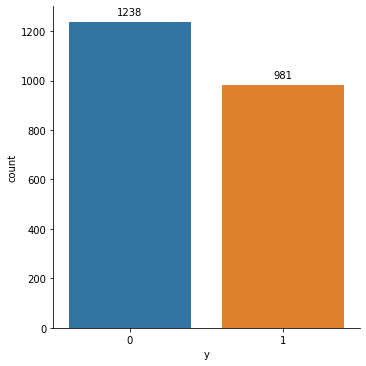

In [20]:
# we are using catplot to differentiate types of y column
plots = sns.catplot(x="y", kind="count", data = data)
for ax in plots.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height()), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

As our label contains binary values (only two values i.e 0 and 1), we can conclude that it is classification problem.
* Total count of 0s : 1238
* Total count of 1s : 981

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


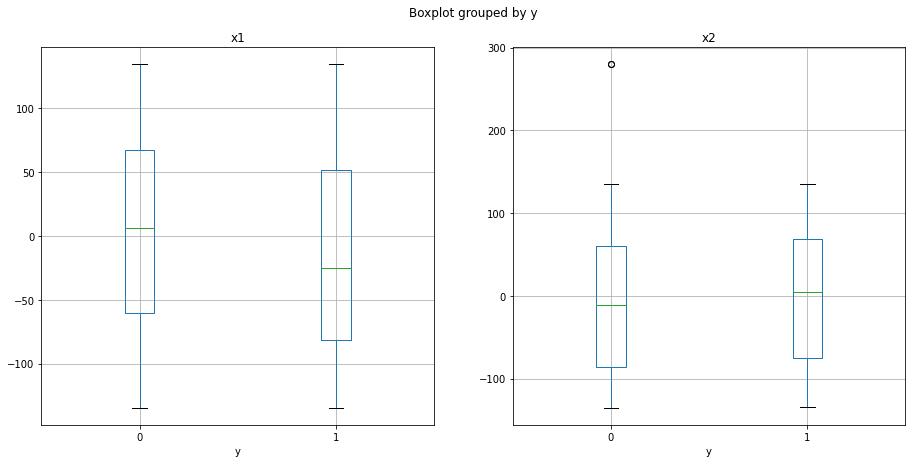

In [21]:
fig, axes = plt.subplots(1,2) 
fig.set_figheight(7)
fig.set_figwidth(15)

for i,col in enumerate(list(data.columns.values)[:-1]):
    a = data.boxplot(col, by="y", ax=axes.flatten()[i])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


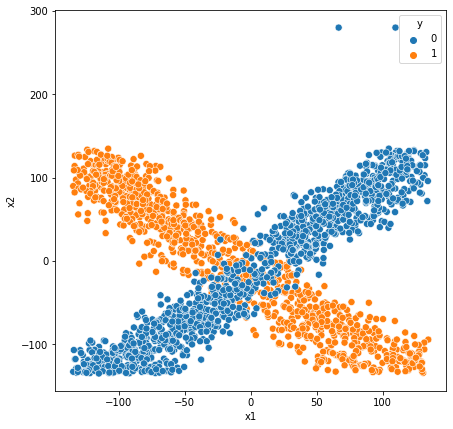

In [22]:
fig, axes = plt.subplots(1,1) 
fig.set_figheight(7)
fig.set_figwidth(7)

# for sepal length vs sepal width
sns.scatterplot(data['x1'], data['x2'], hue = data['y'], s= 50);

### Correlation between variables

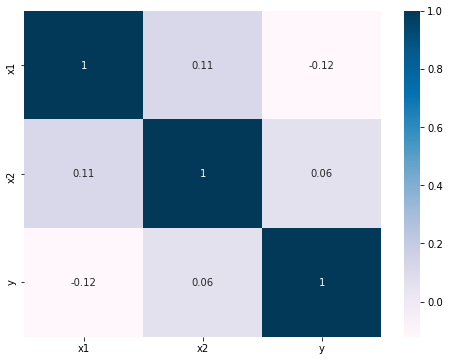

In [23]:
fig = plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot=True, cmap="PuBu")

From the correlation matrix we can easily observe that there is very weak correlation between features and label
### Let's see the distribution of data for different columns

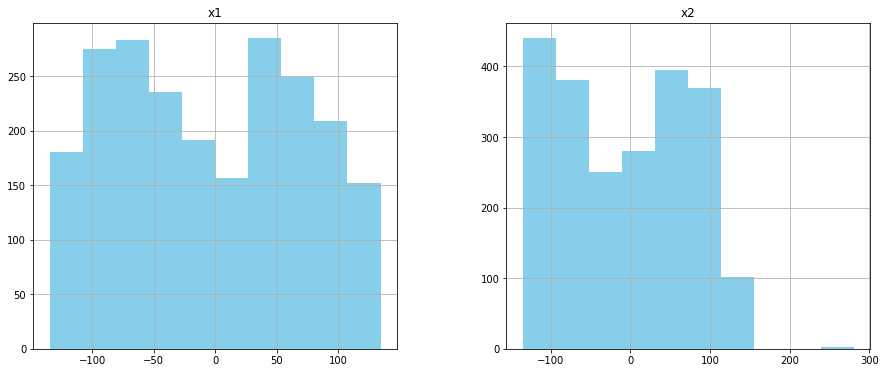

In [24]:
fig, axes = plt.subplots(1,2) 
fig.set_figheight(6)
fig.set_figwidth(15)

for i,col in enumerate(list(data.columns.values)[:-1]):
    a = data.hist(col, ax=axes.flatten()[i], color = "skyblue")

plt.show()


Inspite of our two outliers, we can say that our data is normally distributed.

## 3. Locating dependent and independent variable.

In [25]:
# X contains our features.
X = data.iloc[:,:-1]

# y contains our labels.
y = data.iloc[:,-1]

In [26]:
X.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [27]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

## 4. Splitting the data into train and test set

In [28]:
# splitting the data by giving test size as 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
print("X_train :", X_train.shape, "y_train :", y_train.shape)
print("X_test  :", X_test.shape, " y_test  :", y_test.shape)

X_train : (1553, 2) y_train : (1553,)
X_test  : (666, 2)  y_test  : (666,)


# Applying classification models

**As all the values in our data are numerical, there is no need to normalize them. We'll directly use classification techniques**

## 1. Logistic Regression

In [30]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred_log = logreg_model.predict(X_test)

In [32]:
acc_log = accuracy_score(y_test, y_pred_log)
acc_log

0.7657657657657657

In [33]:
# Let's take a look at confusion matix
conf_matrix = confusion_matrix(y_test, y_pred_log)
conf_matrix

array([[377,   1],
       [155, 133]])

In [34]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       378
           1       0.99      0.46      0.63       288

    accuracy                           0.77       666
   macro avg       0.85      0.73      0.73       666
weighted avg       0.83      0.77      0.74       666



### Hyperparameter Tuning with Logistic regression

In [35]:
parameters = { 
               "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
               "penalty" : ['l2'],
               "C" : [100, 10, 1.0, 0.1, 0.01]
             }

cross_val = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=logreg_model, param_grid = parameters, cv=cross_val, scoring='accuracy')

In [36]:
result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search fail

In [37]:
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.745012 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


## 2. SVM with Linear Kernel

In [40]:
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
y_pred = linear_svc.predict(X_test)

In [42]:
acc_svc_linear = accuracy_score(y_test, y_pred)
acc_svc_linear

0.7522522522522522

In [43]:
# Let's take a look at confusion matix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[377,   1],
       [164, 124]])

### Hyperparameter tuning for Linear SVC

In [ ]:
params = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]
             }

grid = GridSearchCV(estimator = linear_svc, param_grid = params )

grid.fit(X_train,y_train)

In [ ]:
print(grid.best_estimator_)

## 3. SVM with RBF Kernel

In [ ]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

In [ ]:
y_pred = rbf_svc.predict(X_test)

In [ ]:
acc_svc_rbf = accuracy_score(y_test, y_pred)
acc_svc_rbf

In [ ]:
# Let's take a look at confusion matix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

### Hyperparameter tuning with rbf kernel

In [ ]:
params = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001]
             }

grid = GridSearchCV(estimator = rbf_svc, param_grid = params )

grid.fit(X_train,y_train)

In [ ]:
print(grid.best_estimator_)

## 4. Decision Tree Classification

In [38]:
# fitting our Decision tree model on train set
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
# making predictions on test set
y_pred = DT_model.predict(X_test)

### Hyperparameter tuning with Decision Tree classifier

In [43]:
param_grid ={
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,4,5,6,7],
}

gridsearch = GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)


gridsearch.fit(X_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [44]:
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [45]:
best_model = gridsearch.best_estimator_

In [46]:
best_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
gridsearch.best_score_

0.9542431761786598

## 5. KNN

In [48]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
y_predict = knn_model.predict(X_test)

In [49]:
acc_knn = accuracy_score(y_test, y_pred)
acc_knn

0.9354354354354354

In [50]:
# Let's take a look at confusion matix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[350,  28],
       [ 15, 273]])

### Hyperparameter Tuning

In [51]:
ks =21
mean_acc = np.zeros((ks-1))

for n in range(1,ks):
    neighbors = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_hat = neighbors.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,y_hat)

In [52]:
mean_acc

array([0.93093093, 0.95045045, 0.94594595, 0.94894895, 0.94594595,
       0.94894895, 0.94744745, 0.95195195, 0.94894895, 0.95045045,
       0.95045045, 0.94894895, 0.94894895, 0.95045045, 0.94894895,
       0.94894895, 0.95195195, 0.94894895, 0.94594595, 0.94444444])

In [53]:
print("The best accuracy : ",mean_acc.max(),"k=",mean_acc.argmax()+1)

The best accuracy :  0.9519519519519519 k= 8


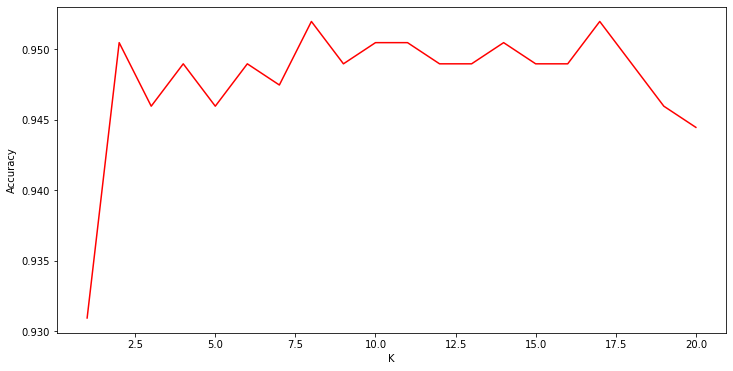

In [54]:
plt.figure(figsize=(12,6))
plt.plot(range(1,ks),mean_acc,'r')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.show()